In [1]:
# Imports and defs
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

def get_extent(hist):
    x_min = hist[1][0]
    x_max = hist[1][-1]
    y_min = hist[2][0]
    y_max = hist[2][-1]
    return [x_min, x_max, y_min, y_max]

def stats(benchmark):    
    # Plots
    hist = np.load(f'/traces/{benchmark}/histograms.npz', allow_pickle=True)
    plt.figure(figsize=(10, 8))
    plt.suptitle(benchmark)

    plt.subplot(221)
    hb = plt.imshow(hist['time_dt'][0].T, cmap='hot', extent=get_extent(hist['time_dt']), aspect='auto')
    plt.colorbar(hb)
    plt.xlabel('Access Number')
    plt.ylabel('Access Delta')
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

    plt.subplot(222)
    hb = plt.imshow(hist['time_dt_miss'][0].T, cmap='hot', aspect='auto', extent=get_extent(hist['time_dt_miss']))
    plt.colorbar(hb)
    plt.xlabel('Access Number')
    plt.ylabel('Missed Access Delta')
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

    plt.subplot(223)
    hb = plt.imshow(hist['missn_dt'][0].T, cmap='hot', extent=get_extent(hist['missn_dt']), aspect='auto')
    plt.colorbar(hb)
    plt.xlabel('Miss Number')
    plt.ylabel('Access Delta')
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

    plt.subplot(224)
    hb = plt.imshow(hist['missn_dtmiss'][0].T, cmap='hot', extent=get_extent(hist['missn_dtmiss']), aspect='auto')
    plt.colorbar(hb)
    plt.xlabel('Miss Number')
    plt.ylabel('Miss Delta')
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Stats CSV
    return pd.read_csv(f'/traces/{benchmark}/stats.csv', index_col=0)

def stats_table(y_hat):
    # Load table foreach benchmark
    benchmarks = [
        'blackscholes', 
        'bodytrack',
        'canneal',
        'dedup',
        'facesim',
        'ferret',
        'fluidanimate',
        'freqmine',
        'raytrace',
        'streamcluster',
        'swaptions',
        'vips',
        'x264',
    ]
    rows = []
    for b in benchmarks:
        df = pd.read_csv(f'/traces/{b}/stats.csv', index_col=0)[y_hat] \
                .transpose()#.set_index([b])
        rows.append(df)
    # Return DF
    return pd.DataFrame(rows).set_index(pd.Index(benchmarks))


In [2]:
stats_table('access')

,trace len,unique addr,unique deltas,rare deltas (< 10),rare deltas fract,unique deltas (no rare),deltas 50% mass,deltas 50K coverage,deltas 16 bit coverage,deltas full coverage bits
blackscholes,4.579842e+07,28772.0,32911.0,8.0,1.746785e-07,32904.0,15.0,1.000000,1.000000,16.0
bodytrack,2.006469e+08,3694464.0,5725802.0,18140496.0,9.041005e-02,250683.0,17.0,0.877561,0.885135,23.0
canneal,7.152518e+07,1858297.0,3293233.0,11103146.0,1.552341e-01,385504.0,18.0,0.776742,0.783911,22.0
dedup,9.106470e+08,22065054.0,18505899.0,33354495.0,3.662725e-02,1349479.0,17.0,0.817156,0.824531,25.0
facesim,1.000000e+09,35105242.0,25820707.0,86652103.0,8.665210e-02,6693625.0,34.0,0.805939,0.806498,25.0
ferret,8.205326e+08,3600432.0,39565695.0,82541618.0,1.005952e-01,4550565.0,829.0,0.727950,0.737718,26.0
fluidanimate,3.037450e+08,1442013.0,2921894.0,8557308.0,2.817267e-02,615574.0,142.0,0.873014,0.883672,22.0
freqmine,6.856194e+08,14525240.0,33820551.0,57983222.0,8.457057e-02,4691485.0,84.0,0.670615,0.677768,26.0
raytrace,4.160282e+08,3184097.0,3604303.0,7835442.0,1.883392e-02,61421.0,29.0,0.980892,0.981255,22.0
streamcluster,4.512756e+08,166392.0,422811.0,458824.0,1.016727e-03,152914.0,6545.0,0.916653,0.959741,19.0


In [3]:
stats_table('miss')

,trace len,unique addr,unique deltas,rare deltas (< 10),rare deltas fract,unique deltas (no rare),deltas 50% mass,deltas 50K coverage,deltas 16 bit coverage,deltas full coverage bits
blackscholes,1819.0,1819.0,38.0,33.0,0.018142,6.0,3.0,1.000000,1.000000,6.0
bodytrack,78544.0,78544.0,2720.0,2882.0,0.036693,116.0,2.0,1.000000,1.000000,12.0
canneal,567817.0,462932.0,440636.0,478246.0,0.842254,11.0,156728.0,0.312039,0.339400,19.0
dedup,353222.0,347444.0,4226.0,5304.0,0.015016,33.0,2.0,1.000000,1.000000,13.0
facesim,3342586.0,2812646.0,1143000.0,1166186.0,0.348887,521.0,1.0,0.673008,0.677656,21.0
ferret,124670.0,124670.0,35257.0,48223.0,0.386805,643.0,36.0,1.000000,1.000000,16.0
fluidanimate,173260.0,173260.0,11178.0,11805.0,0.068135,83.0,2.0,1.000000,1.000000,14.0
freqmine,1126199.0,875156.0,303796.0,328947.0,0.292086,1510.0,3.0,0.774644,0.788439,19.0
raytrace,352356.0,337114.0,178221.0,189966.0,0.539131,578.0,4702.0,0.636104,0.680196,18.0
streamcluster,11456.0,11456.0,293.0,313.0,0.027322,3.0,1.0,1.000000,1.000000,9.0


In [4]:
stats_table('miss (access delta)')

,trace len,unique addr,unique deltas,rare deltas (< 10),rare deltas fract,unique deltas (no rare),deltas 50% mass,deltas 50K coverage,deltas 16 bit coverage,deltas full coverage bits
blackscholes,1819.0,1819.0,1054.0,1051.0,0.577790,3.0,145.0,1.000000,1.000000,11.0
bodytrack,78544.0,78544.0,18233.0,19316.0,0.245926,531.0,3.0,1.000000,1.000000,15.0
canneal,567817.0,462932.0,464845.0,559847.0,0.985964,5.0,180937.0,0.200963,0.255684,19.0
dedup,353222.0,347444.0,9740.0,12743.0,0.036076,129.0,2.0,1.000000,1.000000,14.0
facesim,3342586.0,2812646.0,1142986.0,1173655.0,0.351122,101.0,2.0,0.673012,0.677660,21.0
ferret,124670.0,124670.0,122558.0,123759.0,0.992693,18.0,60223.0,0.418000,0.542617,17.0
fluidanimate,173260.0,173260.0,99117.0,99533.0,0.574472,70.0,12487.0,0.716513,0.806181,17.0
freqmine,1126199.0,875156.0,1012932.0,1040248.0,0.923680,422.0,449833.0,0.144972,0.158767,20.0
raytrace,352356.0,337114.0,325537.0,345500.0,0.980542,90.0,149359.0,0.218015,0.262107,19.0
streamcluster,11456.0,11456.0,8750.0,8770.0,0.765538,4.0,3022.0,1.000000,1.000000,14.0


,access,miss,miss (access delta)
trace len,4.579842e+07,1819.000000,1819.00000
unique addr,2.877200e+04,1819.000000,1819.00000
unique deltas,3.291100e+04,38.000000,1054.00000
rare deltas (< 10),8.000000e+00,33.000000,1051.00000
rare deltas fract,1.746785e-07,0.018142,0.57779
unique deltas (no rare),3.290400e+04,6.000000,3.00000
deltas 50% mass,1.500000e+01,3.000000,145.00000
deltas 50K coverage,1.000000e+00,1.000000,1.00000
deltas 16 bit coverage,1.000000e+00,1.000000,1.00000
deltas full coverage bits,1.600000e+01,6.000000,11.00000


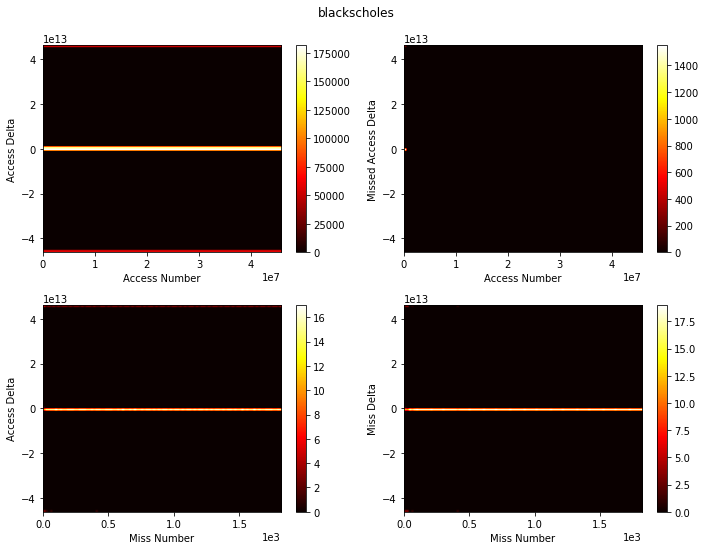

In [5]:
stats('blackscholes')

,access,miss,miss (access delta)
trace len,2.006469e+08,78544.000000,78544.000000
unique addr,3.694464e+06,78544.000000,78544.000000
unique deltas,5.725802e+06,2720.000000,18233.000000
rare deltas (< 10),1.814050e+07,2882.000000,19316.000000
rare deltas fract,9.041005e-02,0.036693,0.245926
unique deltas (no rare),2.506830e+05,116.000000,531.000000
deltas 50% mass,1.700000e+01,2.000000,3.000000
deltas 50K coverage,8.775615e-01,1.000000,1.000000
deltas 16 bit coverage,8.851353e-01,1.000000,1.000000
deltas full coverage bits,2.300000e+01,12.000000,15.000000


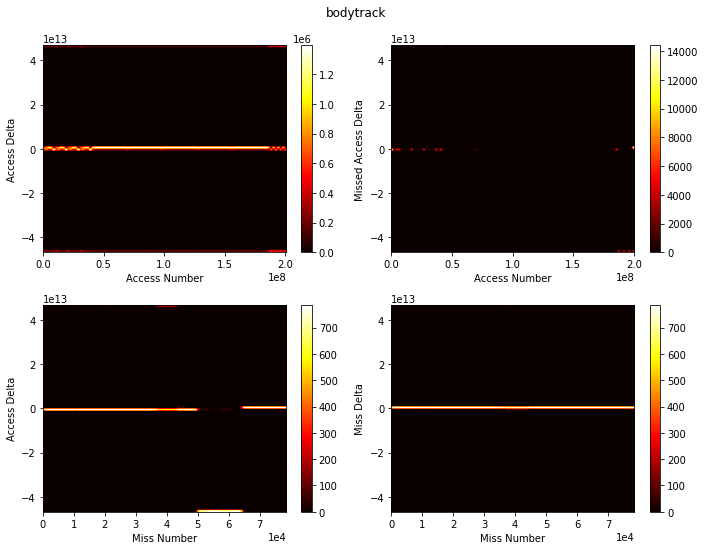

In [6]:
stats('bodytrack')

,access,miss,miss (access delta)
trace len,7.152518e+07,567817.000000,567817.000000
unique addr,1.858297e+06,462932.000000,462932.000000
unique deltas,3.293233e+06,440636.000000,464845.000000
rare deltas (< 10),1.110315e+07,478246.000000,559847.000000
rare deltas fract,1.552341e-01,0.842254,0.985964
unique deltas (no rare),3.855040e+05,11.000000,5.000000
deltas 50% mass,1.800000e+01,156728.000000,180937.000000
deltas 50K coverage,7.767418e-01,0.312039,0.200963
deltas 16 bit coverage,7.839113e-01,0.339400,0.255684
deltas full coverage bits,2.200000e+01,19.000000,19.000000


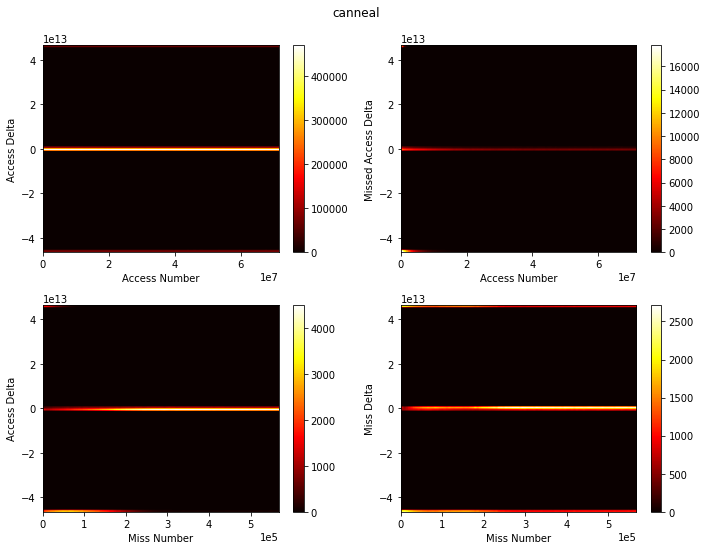

In [7]:
stats('canneal')

,access,miss,miss (access delta)
trace len,9.106470e+08,353222.000000,353222.000000
unique addr,2.206505e+07,347444.000000,347444.000000
unique deltas,1.850590e+07,4226.000000,9740.000000
rare deltas (< 10),3.335450e+07,5304.000000,12743.000000
rare deltas fract,3.662725e-02,0.015016,0.036076
unique deltas (no rare),1.349479e+06,33.000000,129.000000
deltas 50% mass,1.700000e+01,2.000000,2.000000
deltas 50K coverage,8.171564e-01,1.000000,1.000000
deltas 16 bit coverage,8.245315e-01,1.000000,1.000000
deltas full coverage bits,2.500000e+01,13.000000,14.000000


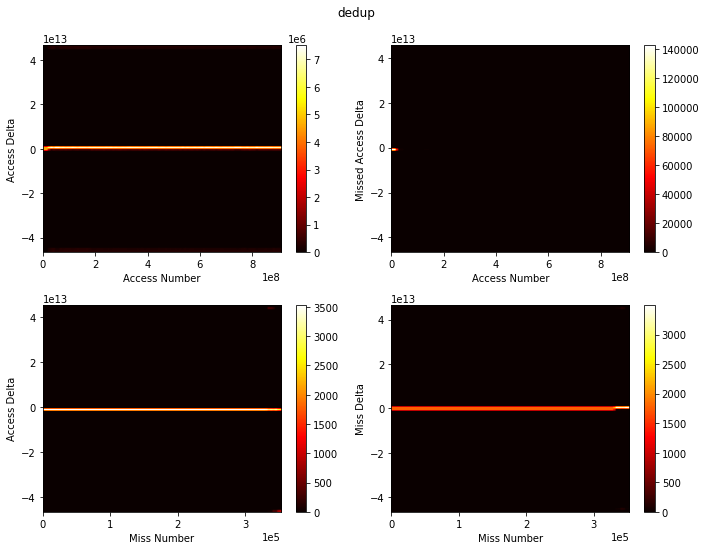

In [8]:
stats('dedup')

,access,miss,miss (access delta)
trace len,1.000000e+09,3.342586e+06,3.342586e+06
unique addr,3.510524e+07,2.812646e+06,2.812646e+06
unique deltas,2.582071e+07,1.143000e+06,1.142986e+06
rare deltas (< 10),8.665210e+07,1.166186e+06,1.173655e+06
rare deltas fract,8.665210e-02,3.488874e-01,3.511219e-01
unique deltas (no rare),6.693625e+06,5.210000e+02,1.010000e+02
deltas 50% mass,3.400000e+01,1.000000e+00,2.000000e+00
deltas 50K coverage,8.059386e-01,6.730077e-01,6.730119e-01
deltas 16 bit coverage,8.064979e-01,6.776556e-01,6.776598e-01
deltas full coverage bits,2.500000e+01,2.100000e+01,2.100000e+01


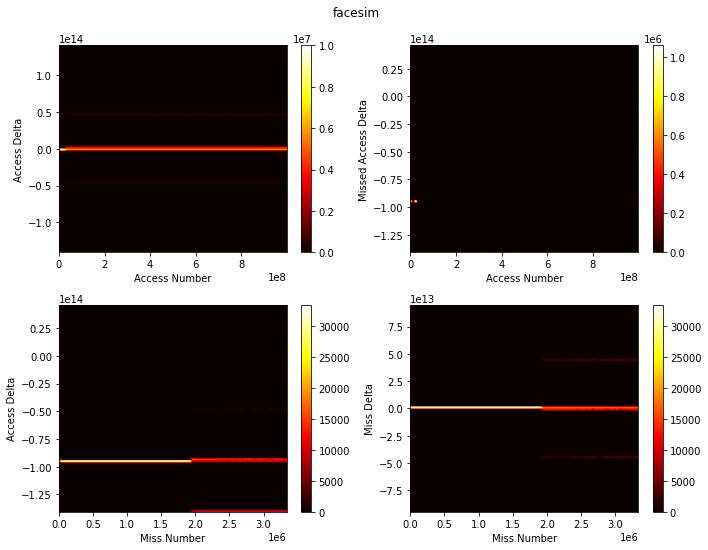

In [9]:
stats('facesim')

,access,miss,miss (access delta)
trace len,8.205326e+08,124670.000000,124670.000000
unique addr,3.600432e+06,124670.000000,124670.000000
unique deltas,3.956570e+07,35257.000000,122558.000000
rare deltas (< 10),8.254162e+07,48223.000000,123759.000000
rare deltas fract,1.005952e-01,0.386805,0.992693
unique deltas (no rare),4.550565e+06,643.000000,18.000000
deltas 50% mass,8.290000e+02,36.000000,60223.000000
deltas 50K coverage,7.279498e-01,1.000000,0.418000
deltas 16 bit coverage,7.377176e-01,1.000000,0.542617
deltas full coverage bits,2.600000e+01,16.000000,17.000000


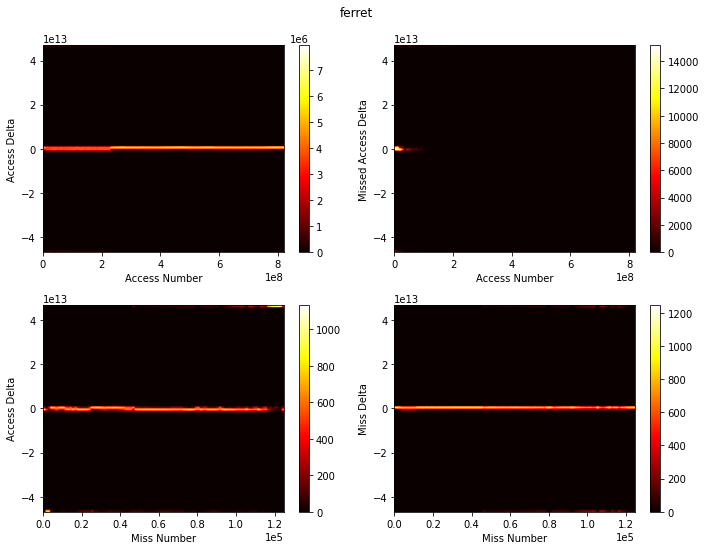

In [10]:
stats('ferret')

,access,miss,miss (access delta)
trace len,3.037450e+08,173260.000000,173260.000000
unique addr,1.442013e+06,173260.000000,173260.000000
unique deltas,2.921894e+06,11178.000000,99117.000000
rare deltas (< 10),8.557308e+06,11805.000000,99533.000000
rare deltas fract,2.817267e-02,0.068135,0.574472
unique deltas (no rare),6.155740e+05,83.000000,70.000000
deltas 50% mass,1.420000e+02,2.000000,12487.000000
deltas 50K coverage,8.730136e-01,1.000000,0.716513
deltas 16 bit coverage,8.836716e-01,1.000000,0.806181
deltas full coverage bits,2.200000e+01,14.000000,17.000000


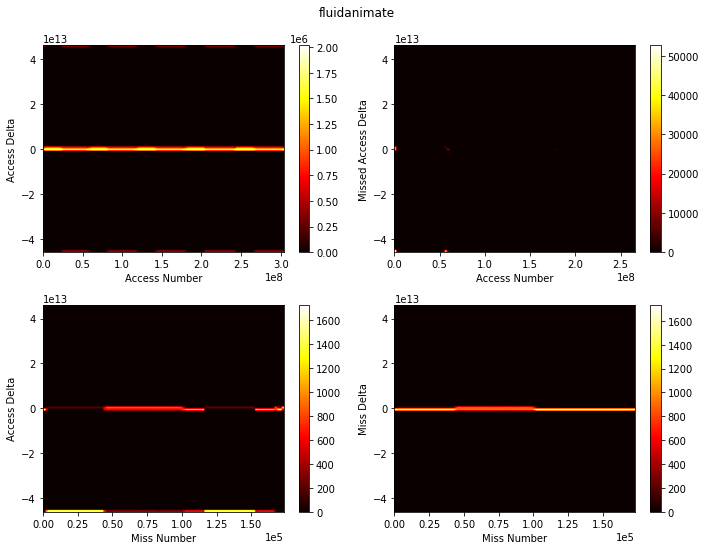

In [11]:
stats('fluidanimate')

,access,miss,miss (access delta)
trace len,6.856194e+08,1.126199e+06,1.126199e+06
unique addr,1.452524e+07,8.751560e+05,8.751560e+05
unique deltas,3.382055e+07,3.037960e+05,1.012932e+06
rare deltas (< 10),5.798322e+07,3.289470e+05,1.040248e+06
rare deltas fract,8.457057e-02,2.920860e-01,9.236805e-01
unique deltas (no rare),4.691485e+06,1.510000e+03,4.220000e+02
deltas 50% mass,8.400000e+01,3.000000e+00,4.498330e+05
deltas 50K coverage,6.706150e-01,7.746437e-01,1.449717e-01
deltas 16 bit coverage,6.777685e-01,7.884388e-01,1.587668e-01
deltas full coverage bits,2.600000e+01,1.900000e+01,2.000000e+01


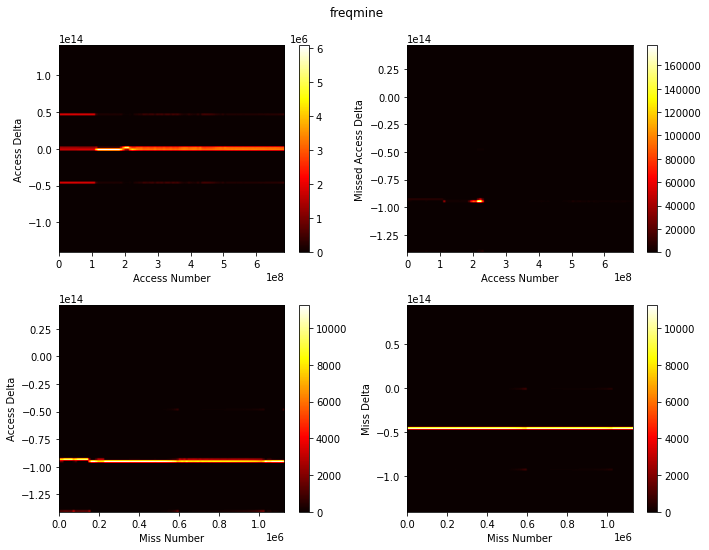

In [12]:
stats('freqmine')

,access,miss,miss (access delta)
trace len,4.160282e+08,352356.000000,352356.000000
unique addr,3.184097e+06,337114.000000,337114.000000
unique deltas,3.604303e+06,178221.000000,325537.000000
rare deltas (< 10),7.835442e+06,189966.000000,345500.000000
rare deltas fract,1.883392e-02,0.539131,0.980542
unique deltas (no rare),6.142100e+04,578.000000,90.000000
deltas 50% mass,2.900000e+01,4702.000000,149359.000000
deltas 50K coverage,9.808916e-01,0.636104,0.218015
deltas 16 bit coverage,9.812551e-01,0.680196,0.262107
deltas full coverage bits,2.200000e+01,18.000000,19.000000


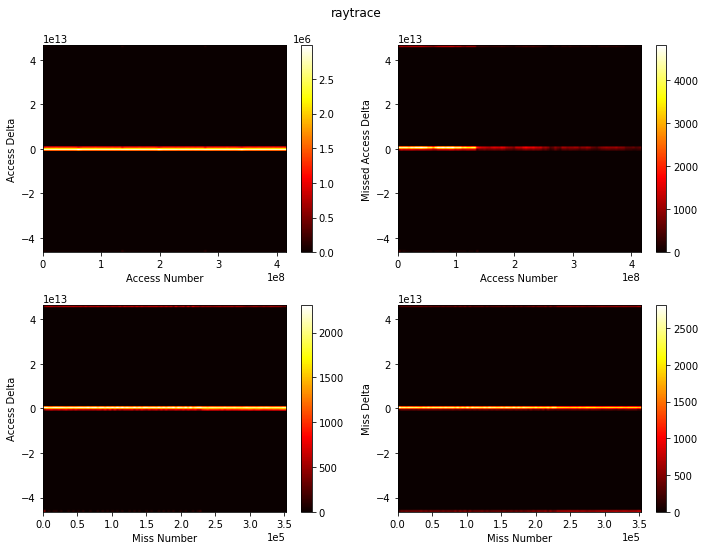

In [13]:
stats('raytrace')

,access,miss,miss (access delta)
trace len,4.512756e+08,11456.000000,11456.000000
unique addr,1.663920e+05,11456.000000,11456.000000
unique deltas,4.228110e+05,293.000000,8750.000000
rare deltas (< 10),4.588240e+05,313.000000,8770.000000
rare deltas fract,1.016727e-03,0.027322,0.765538
unique deltas (no rare),1.529140e+05,3.000000,4.000000
deltas 50% mass,6.545000e+03,1.000000,3022.000000
deltas 50K coverage,9.166531e-01,1.000000,1.000000
deltas 16 bit coverage,9.597407e-01,1.000000,1.000000
deltas full coverage bits,1.900000e+01,9.000000,14.000000


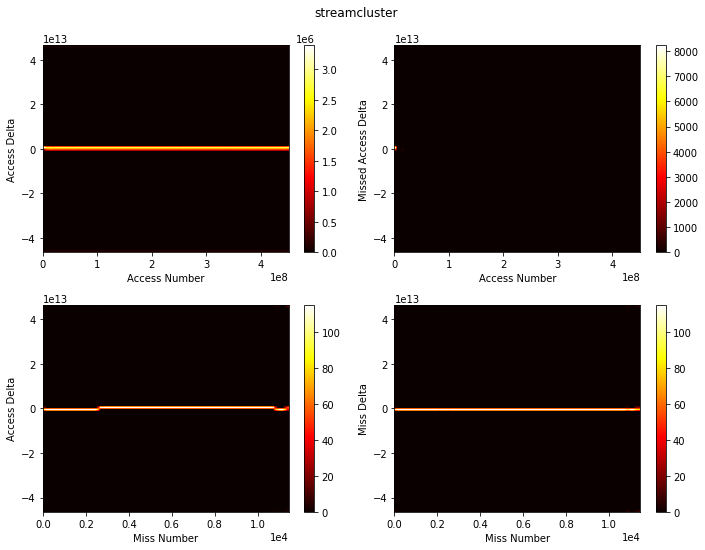

In [14]:
stats('streamcluster')

,access,miss,miss (access delta)
trace len,6.176676e+08,6347.00000,6347.00000
unique addr,4.927300e+04,6347.00000,6347.00000
unique deltas,7.862600e+04,757.00000,3028.00000
rare deltas (< 10),5.378000e+03,1002.00000,4662.00000
rare deltas fract,8.706949e-06,0.15787,0.73452
unique deltas (no rare),7.517200e+04,39.00000,23.00000
deltas 50% mass,6.700000e+01,2.00000,254.00000
deltas 50K coverage,9.801034e-01,1.00000,1.00000
deltas 16 bit coverage,9.952193e-01,1.00000,1.00000
deltas full coverage bits,1.700000e+01,10.00000,12.00000


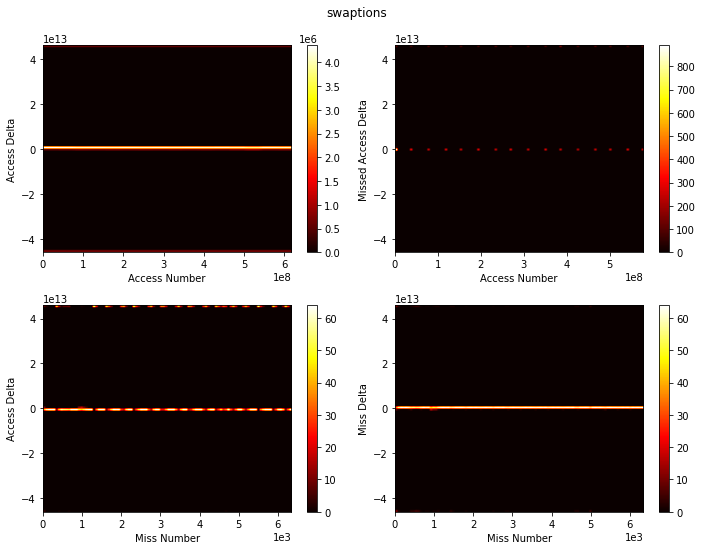

In [15]:
stats('swaptions')

,access,miss,miss (access delta)
trace len,9.912752e+08,141348.000000,141348.000000
unique addr,8.028878e+06,141348.000000,141348.000000
unique deltas,1.451762e+07,3313.000000,130001.000000
rare deltas (< 10),3.309479e+07,3571.000000,131700.000000
rare deltas fract,3.338608e-02,0.025264,0.931743
unique deltas (no rare),1.640648e+06,64.000000,30.000000
deltas 50% mass,8.200000e+01,1.000000,59327.000000
deltas 50K coverage,7.076606e-01,1.000000,0.434014
deltas 16 bit coverage,7.266914e-01,1.000000,0.543927
deltas full coverage bits,2.400000e+01,12.000000,17.000000


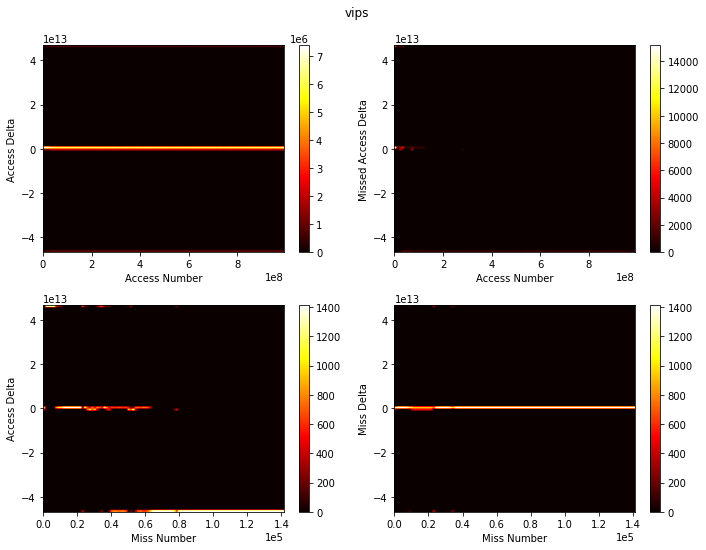

In [16]:
stats('vips')

,access,miss,miss (access delta)
trace len,2.234599e+08,152406.000000,152406.000000
unique addr,3.702729e+06,152406.000000,152406.000000
unique deltas,6.126425e+06,7478.000000,14390.000000
rare deltas (< 10),1.508416e+07,11572.000000,17480.000000
rare deltas fract,6.750275e-02,0.075929,0.114694
unique deltas (no rare),4.845740e+05,551.000000,450.000000
deltas 50% mass,1.480000e+02,3.000000,3.000000
deltas 50K coverage,9.010589e-01,1.000000,1.000000
deltas 16 bit coverage,9.032317e-01,1.000000,1.000000
deltas full coverage bits,2.300000e+01,13.000000,14.000000


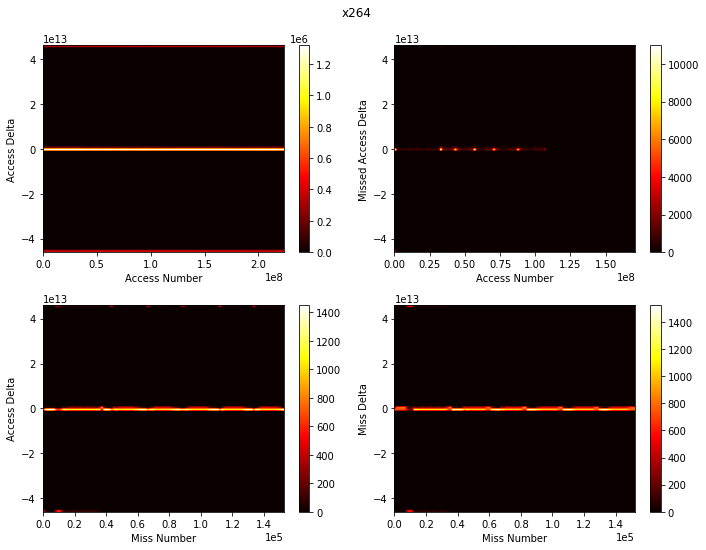

In [17]:
stats('x264')